IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files


# Load the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("World Energy Consumption.csv")

df.head()

Saving World Energy Consumption.csv to World Energy Consumption (3).csv


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [ ]:
print(df.info())
print(df.isnull().sum().head(20))

df = df.dropna(axis=1, thresh=len(df)*0.4)
df = df.dropna(subset=['country', 'year'])

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df = df.drop_duplicates()
df = df.reset_index(drop=True)

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB
None
country                        0
year                           0
iso_code                    5500
population                  3889
gdp                        10899
biofuel_cons_change_pct    20265
biofuel_cons_change_twh    19325
biofuel_cons_per_capita    19710
biofuel_consumption        19245
biofuel_elec_per_capita    16737
biofuel_electricity        16485
biofuel_share_elec         16520
biofuel_share_energy       19341
carbon_intensity_elec      16847
coal_cons_change_pct       16754
coal_cons_change_twh       16697
coal_cons_per_capita       17346
coal_consumption           16592
coal_elec_per_capita       16162
coal_electricity           15568
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Data columns (total 22 columns):
 #   Column          

,country,year,iso_code,population,gdp,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,...,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_electricity,low_carbon_electricity,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption
0,ASEAN (Ember),2000,NaN,1.053096e+08,3.585114e+11,18.829855,16.598514,3433.321377,969.427817,3.939268,...,17.738246,6411.481952,612.403733,50.37,72.90,21.61267,24.072559,25366.87219,1227.628911,4510.825629
1,ASEAN (Ember),2001,NaN,1.053096e+08,3.585114e+11,18.829855,16.598514,3433.321377,969.427817,3.939268,...,17.738246,6411.481952,612.403733,54.26,76.68,21.61267,24.072559,25366.87219,1227.628911,4510.825629
2,ASEAN (Ember),2002,NaN,1.053096e+08,3.585114e+11,18.829855,16.598514,3433.321377,969.427817,3.939268,...,17.738246,6411.481952,612.403733,53.32,75.99,21.61267,24.072559,25366.87219,1227.628911,4510.825629
3,ASEAN (Ember),2003,NaN,1.053096e+08,3.585114e+11,18.829855,16.598514,3433.321377,969.427817,3.939268,...,17.738246,6411.481952,612.403733,53.28,75.71,21.61267,24.072559,25366.87219,1227.628911,4510.825629
4,ASEAN (Ember),2004,NaN,1.053096e+08,3.585114e+11,18.829855,16.598514,3433.321377,969.427817,3.939268,...,17.738246,6411.481952,612.403733,52.88,77.02,21.61267,24.072559,25366.87219,1227.628911,4510.825629


INFORMATION ABOUT THE DATASET

In [ ]:
print("Total Countries:", df['country'].nunique())
print("Year Range:", df['year'].min(), "to", df['year'].max())
print("\nDataset Summary:\n", df.describe())

Total Countries: 306
Year Range: 1900 to 2022

Dataset Summary:
                year    population           gdp  biofuel_cons_change_pct  \
count  22012.000000  1.812300e+04  1.111300e+04              1747.000000   
mean    1974.213247  1.053096e+08  3.585114e+11                46.091694   
std       35.058653  4.640460e+08  2.411179e+12               274.616745   
min     1900.000000  1.833000e+03  1.642060e+08              -100.000000   
25%     1946.000000  1.712404e+06  1.365898e+10                -0.616500   
50%     1984.000000  6.991543e+06  4.167411e+10                 8.179000   
75%     2003.000000  2.557688e+07  1.744295e+11                26.508500   
max     2022.000000  7.975105e+09  1.136302e+14              5659.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count              2687.000000              2302.000000          2767.000000   
mean                  2.719074               133.558459            38.068209   
std       

Global Electricity Generation OverTime

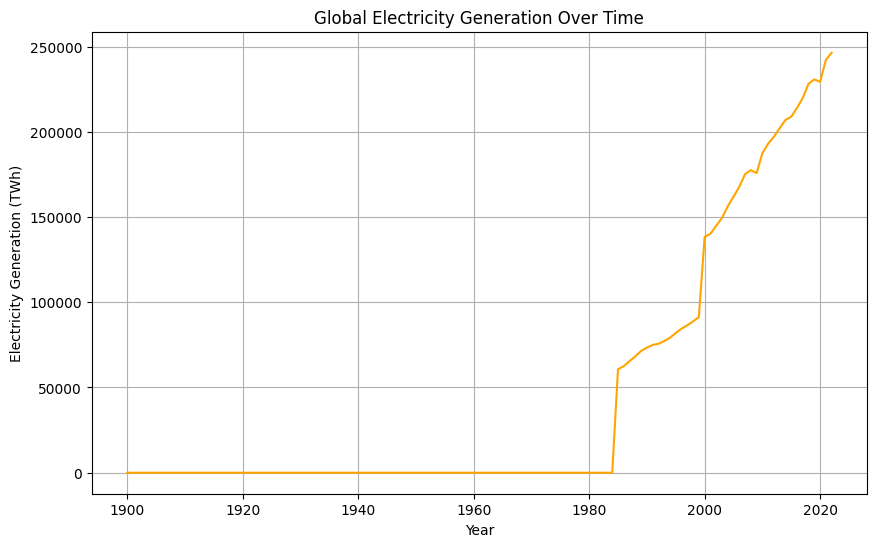

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('year')['electricity_generation'].sum().plot(color='orange')
plt.title("Global Electricity Generation Over Time")
plt.xlabel("Year")
plt.ylabel("Electricity Generation (TWh)")
plt.grid(True)
plt.show()



Predict Future Energy Consumption

In [ ]:

data = df.groupby('year')['electricity_generation'].sum().reset_index()
X = data[['year']]
y = data['electricity_generation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.5345685753667611
MSE: 1683871756.429515


Visualize Predictions

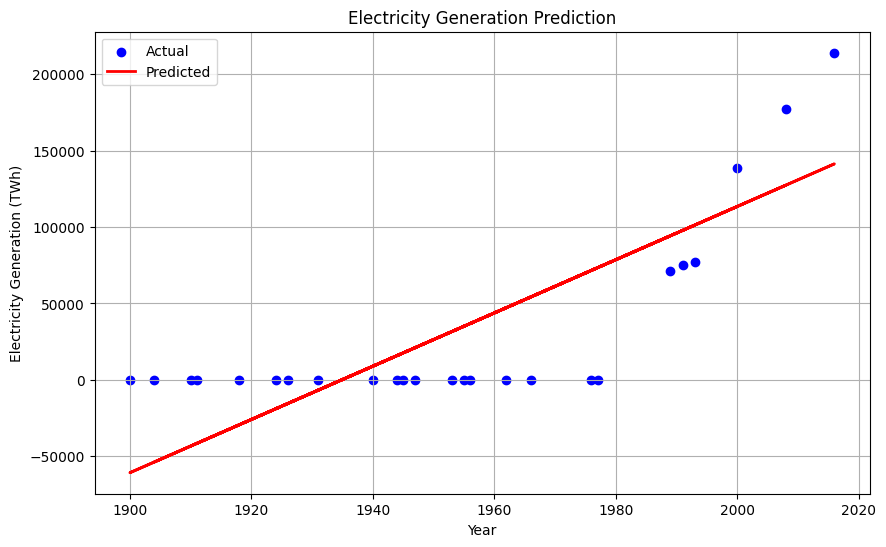

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Electricity Generation Prediction")
plt.xlabel("Year")
plt.ylabel("Electricity Generation (TWh)")
plt.legend()
plt.grid(True)
plt.show()
